<a href="https://colab.research.google.com/github/yonehai/ML-labs/blob/main/lab5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%load_ext tensorboard

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tensorboard

tensorboard.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.7.0'

In [17]:
!rm -rf ./logs/

In [18]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

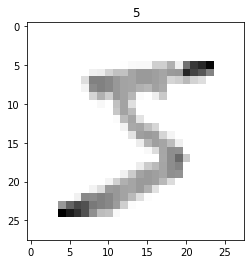

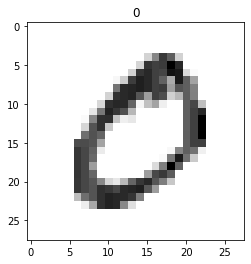

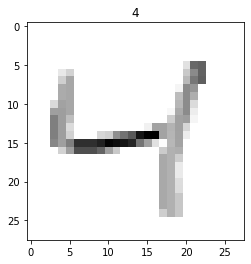

In [19]:
for i in range(3):
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.title(y_train[i])
    plt.show()

In [20]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

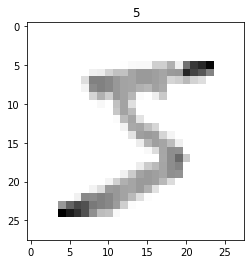

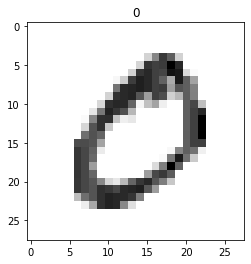

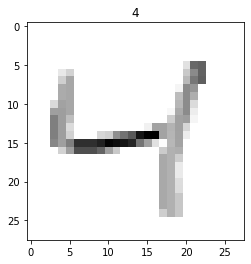

In [21]:
for i in range(3):
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.title(y_train[i])
    plt.show()

In [22]:
model = tf.keras.models.Sequential()
#Стек слоев 
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#Первый слой этой сети - tf.keras.layers.Flatten, преобразует формат изображения 
#из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя).
#Слой извлекает строки пикселей из изображения и выстраивает их в один ряд.
#Этот слой не имеет параметров для обучения; он только переформатирует данные.
model.add(tf.keras.layers.Dense(128, activation='relu'))
#tf.keras.layers.Dense. Это полносвязные нейронные слои.
#128 шарів, функція активації RELU
model.add(tf.keras.layers.Dropout(0.2))
#(training = 1, testing = 0)
model.add(tf.keras.layers.Dense(128, activation='relu'))
#tf.keras.layers.Dense. Это полносвязные нейронные слои.
#128 шарів, функція активації RELU
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#10-узловой softmax слой возвращает массив из 10 вероятностных оценок дающих в сумме 1.
#Каждый узел содержит оценку указывающую вероятность принадлежности изображения к одному из 10 классов. 


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# метод model.compile создает модель и принимает параметр 'metrics',
# чтобы определить, какие метрики используются для оценки во время обучения и тестирования.

# Функция потерь (Loss function) — измеряет точность модели во время обучения. 
# Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.
#----
# Оптимизатор (Optimizer) — показывает каким образом обновляется модель на основе входных данных и функции потерь.
#----
# Метрики (Metrics) — используются для мониторинга тренировки и тестирования модели.
# Наш пример использует метрику accuracy равную доле правильно классифицированных изображений.


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [23]:
history = model.fit(x_train, y_train, epochs=3, callbacks=[tensorboard_callback])

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3023 - accuracy: 0.9107
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1424 - accuracy: 0.9556
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1057 - accuracy: 0.9671


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [25]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0990 - accuracy: 0.9689
0.09897277504205704 0.9689000248908997


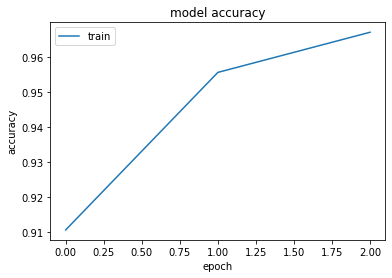

In [26]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

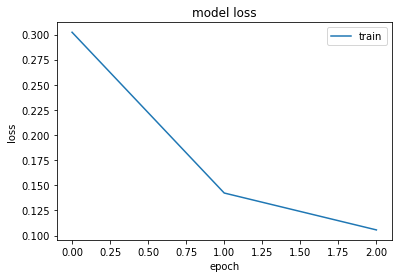

In [27]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

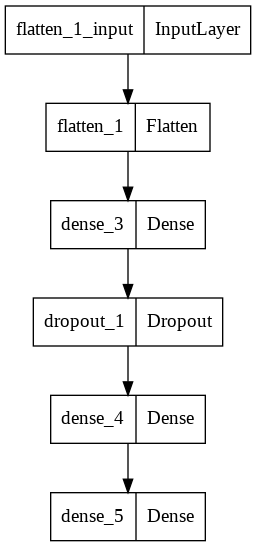

In [28]:
tf.keras.utils.plot_model(model)